In [1]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#This function calculates the invariant mass of e+e-
def massa_invariante(p1,p2):
    
    massa_invariante = []
    
    for i in range(10000):
        mI = 0
        for j in range(4):
            if j == 0:
                tensor = 1
            else:
                tensor = -1
            mI = mI + tensor*((p1[i][j]+p2[i][j])**2)
        massa_invariante.append(np.sqrt(mI))
        

    
    return massa_invariante

In [3]:
#Lendo o arquivo LHE:
p1 = []
p2 = []
num_eventos = pylhe.readNumEvents('unweighted_events.lhe')


for e in pylhe.readLHE('unweighted_events.lhe'):
    quadrimomento1 = []
    quadrimomento2 = []
    for mu in ['e','px','py','pz']:
        quadrimomento1.append(getattr(e.particles[-1],mu))
        quadrimomento2.append(getattr(e.particles[-2],mu))
    p1.append(quadrimomento1)
    p2.append(quadrimomento2)
    



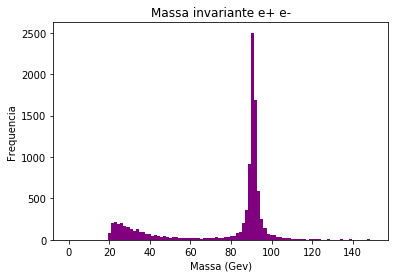

In [4]:
#Plotando o histograma

histogram = plt.hist(massa_invariante(p1,p2), bins = 100, color = 'purple', range = (0,150))
plt.title('Massa invariante e+ e-')
plt.xlabel('Massa (Gev)')
plt.ylabel('Frequencia')
plt.savefig('Massa_invariante')
plt.figure(figsize=[20.0,10.0], dpi = 3000)
plt.show()